<div class="alert alert-warning"> <b>Team Lead comment:</b> Hi,Dima! thank you dor submitting the work) We have weverything we need. Two points though: <br>
1. Why did you use MW test in one case and t-test in another? Please, explain) I also gor different results when I reran the tests. So please, doubloe check that.<br>
2. Please, clean the notebook, make sure that all the comments are in English as you will publish it on GitHub.<br> 
Thanks!</div>

<div class="alert alert-info"> <b>Student comments:</b> 
    
- 1.The Mann–Whitney U test tests a null hypothesis of that the probability that a randomly drawn observation from one group is larger than a randomly drawn observation from the other  so when we test if there is statistically significant differences in the average check between customer segments it is aplaible on first two Hypotheses.
     On the last we need to use 
t-test is two-sided test for the null hypothesis that 2 independent samples have identical average so when we test that Average weekday and weekend sales are the same it is aplaible here.
- Please explain the remark about different results  i have rerun the tests and got same results.
- 2. all clean.</div>    

<div class="alert alert-success"> <b>Team Lead comment:</b> Hello,Dima!
    Thanks! now we have everything) One clarification though <br> 
1. Both MW and t-test are used to check the averages, the difference between them is that MW for non-normal data and t-test is for normal. So you should check for normality first and then decide which one to choose)<br>
</div>

In [97]:
pip install pymystem3


Note: you may need to restart the kernel to use updated packages.


**Task:**

**Analyze the store's product range.**

- Carry out exploratory data analysis
- Analyze the product range
- Formulate and test statistical hypotheses

**Description of the data:**

The dataset contains the transaction history of an online store that sells household goods.

The file `ecommerce_dataset_us.csv` contains the following columns:

`InvoiceNo` — order identifier

`StockCode` — item identifier

`Description` — item name

`Quantity`

`InvoiceDate` — order date

`UnitPrice` — price per item

`CustomerID`

#### Dashboards

1. Suggestion 1
    1. Plot a diagram showing the number of purchases per day
    2. Add an indicator for the number of customers
    3. Add a purchase date filter

In [2]:
import pandas as pd                                         
import numpy as np                                        
import math as mth                                         

import seaborn as sns                                     
import matplotlib.pyplot as plt                            
import plotly.express as px                               
%matplotlib inline

import datetime as dt                                       
import requests                                             
import re                                                   

from pymystem3 import Mystem                                
from collections import Counter                           

import scipy.stats as stats
from scipy import stats as st
#import fasttext
import re
import nltk; from nltk.stem import WordNetLemmatizer;from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize; from nltk.tag import pos_tag #noun extraction
nltk.download('averaged_perceptron_tagger'); nltk.download('punkt')
nltk.download('wordnet'); nltk.download('stopwords')

from sklearn.preprocessing import StandardScaler           
from sklearn.cluster import KMeans                          
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage     

import warnings                                              
warnings.filterwarnings('ignore')                           

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df_path = '/datasets/ecommerce_dataset_us.csv'


In [4]:
df = pd.read_csv(df_path, sep = '\t')

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0


## step 2  Data preprocessing :

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


Some missing values in the description and customer ID columns.invoice date as objects which should be date. We'll keep this in mind.



In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


When looking at the statistical description of the dataframe we can observe some anomalies in the data for the quantity an unit price columns.



Checking for quantity column.



In [8]:
qmin, qmax = df['Quantity'].agg([min, max])

df.query('Quantity in [@qmin, @qmax]')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/07/2019 09:15,2.08,16446.0
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/07/2019 09:27,2.08,16446.0


 It seems likely that the negative values are from canceled orders.

change the name of the product to lower case

In [9]:
df['Description'] = df['Description'].str.lower()

In [10]:
total_duplicates = df.duplicated().sum()  # check for duplicates

partial_duplicates = len(df[df[['Description', 
                                              'CustomerID', 'InvoiceNo']].duplicated() == True][['Description', 'InvoiceNo']])

print('Number of complete duplicates: {} rows'.format(total_duplicates))
print('Number of partial duplicates: {} rows'.format(partial_duplicates))
print('Share of duplicates from the total number of records: {:.2%}'.format((total_duplicates + partial_duplicates) / len(df))) 

Number of complete duplicates: 5268 rows
Number of partial duplicates: 10869 rows
Share of duplicates from the total number of records: 2.98%


Observations: the share of duplicates from the total number of records is 3%, I decide to delete them. Perhaps there were failures when unloading data or when writing.

In [11]:
df = df.drop_duplicates(['Description', 'CustomerID', 'InvoiceNo'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531040 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    531040 non-null  object 
 1   StockCode    531040 non-null  object 
 2   Description  529586 non-null  object 
 3   Quantity     531040 non-null  int64  
 4   InvoiceDate  531040 non-null  object 
 5   UnitPrice    531040 non-null  float64
 6   CustomerID   396577 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 32.4+ MB


In [12]:
df.duplicated().sum() 

0

In [13]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134463
dtype: int64

#### For this dataset, here's the approach for dealing with missing values
      1 Drop customer ids where null
      2 Drop unit price; given it's very low % of missing values we can safely drop

In [14]:
df =df.dropna().reset_index(drop=True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,white hanging heart t-light holder,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,white metal lantern,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,cream cupid hearts coat hanger,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,knitted union flag hot water bottle,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,red woolly hottie white heart.,6,11/29/2018 08:26,3.39,17850.0


In [15]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
dtype: int64

clear all negative prices

In [16]:
df = df.query("UnitPrice >0")

In [17]:
df = df.query("Quantity>0").reset_index(drop=True)

In [18]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,387736.000000,387736.000000,387736.000000
mean,13.224924,3.121187,15282.090874
std,181.631092,21.654984,1713.847315
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13941.000000
50%,6.000000,1.950000,15145.000000
75%,12.000000,3.750000,16790.000000
max,80995.000000,8142.750000,18287.000000


#### 1.3. Data preprocessing

In [19]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [20]:
df.rename(columns={'InvoiceDate': 'datetime'}, inplace=True)

#### 1.4. Data preprocessing

Consider the values in the Quantity column.

99th percentile of the number of items in the order: 121 
Number of lines with abnormal values: 3878 rows
Percentage of anomalous values ​​from the total number of records: 1.0%


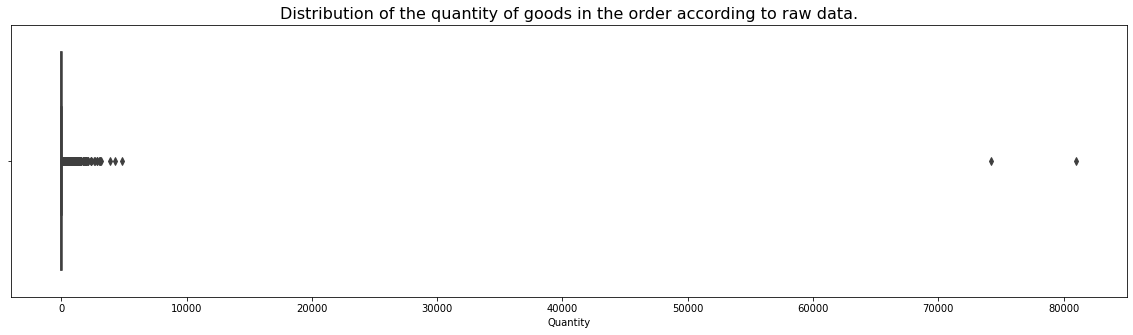

In [21]:
upper_limit_quantity = df['Quantity'].quantile(.99) 
print('99th percentile of the number of items in the order: {:.0f} '.format(upper_limit_quantity))


abnormalnumber_q = df[df['Quantity'] > upper_limit_quantity]['Quantity'].count()
print('Number of lines with abnormal values: {} rows'.format(abnormalnumber_q))
print('Percentage of anomalous values ​​from the total number of records: {:.1%}'.format(abnormalnumber_q / len(df))) 

plt.figure(figsize=(20,5))
sns.boxplot(x='Quantity', data=df) # построим график боксплот
plt.title('Distribution of the quantity of goods in the order according to raw data.', fontsize=16)
plt.show()

Observations: no more than 1% of online store transactions have more than 121 items in the cart. I decide to remove them.


In [22]:
df = df[(df['Quantity'] < upper_limit_quantity)]

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,383858.0,10.003975,14.648065,1.000,2.00,6.00,12.00,120.00
UnitPrice,383858.0,3.139032,21.762952,0.001,1.25,1.95,3.75,8142.75
CustomerID,383858.0,15281.434056,1712.947309,12347.000,13948.00,15145.00,16788.00,18287.00


#### 1.4. Adding required columns..

In [24]:
df['revenue'] = df['Quantity'] * df['UnitPrice']


In [25]:
df['hour'] = df.datetime.dt.hour
df['day'] = (df.datetime.dt.dayofweek) + 1
df['week'] = df.datetime.dt.week
df['month'] = df.datetime.dt.month
df['year'] = df.datetime.dt.year
df['date'] = df.datetime.dt.date

Let's create a separate weekday/weekend column with binary values, where 1 = yes and 0 = no.



In [26]:
def sensor_weekdays(day):
    if  1 <= day <= 5:
        return 1
    else:
        return 0
    
def sensor_weekends(day):
    if  6 <= day <= 7:
        return 1
    else:
        return 0

In [27]:
df['weekdays'] = df['day'].apply(sensor_weekdays)
df['weekends'] = df['day'].apply(sensor_weekends)
display(df.shape)
df.sample(10, random_state=123) 

(383858, 16)

,InvoiceNo,StockCode,Description,Quantity,datetime,UnitPrice,CustomerID,revenue,hour,day,week,month,year,date,weekdays,weekends
260856,569132,47590B,pink happy birthday bunting,1,2019-09-28 13:54:00,5.45,17757.0,5.45,13,6,39,9,2019,2019-09-28,0,1
122734,552643,85123A,white hanging heart t-light holder,2,2019-05-08 13:24:00,2.95,16791.0,5.90,13,3,19,5,2019,2019-05-08,1,0
158228,557217,20979,36 pencils tube red retrospot,16,2019-06-15 12:30:00,1.25,17426.0,20.00,12,6,24,6,2019,2019-06-15,0,1
386830,581451,22310,ivory knitted mug cosy,6,2019-12-06 17:57:00,1.65,17144.0,9.90,17,5,49,12,2019,2019-12-06,1,0
177988,559863,85099B,jumbo bag red retrospot,10,2019-07-11 10:33:00,2.08,15039.0,20.80,10,4,28,7,2019,2019-07-11,1,0
275750,570458,22961,jam making set printed,4,2019-10-08 15:39:00,1.45,14535.0,5.80,15,2,41,10,2019,2019-10-08,1,0
295465,572318,23167,small ceramic top storage jar,2,2019-10-21 16:19:00,0.83,15436.0,1.66,16,1,43,10,2019,2019-10-21,1,0
6795,537202,85049A,traditional christmas ribbons,2,2018-12-03 14:25:00,1.25,14506.0,2.50,14,1,49,12,2018,2018-12-03,1,0
353193,578032,23424,gingham recipe book box,4,2019-11-20 13:41:00,4.95,16633.0,19.80,13,3,47,11,2019,2019-11-20,1,0
165493,558100,20685,doormat red retrospot,1,2019-06-24 13:46:00,7.95,17768.0,7.95,13,1,26,6,2019,2019-06-24,1,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383858 entries, 0 to 387735
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    383858 non-null  object        
 1   StockCode    383858 non-null  object        
 2   Description  383858 non-null  object        
 3   Quantity     383858 non-null  int64         
 4   datetime     383858 non-null  datetime64[ns]
 5   UnitPrice    383858 non-null  float64       
 6   CustomerID   383858 non-null  float64       
 7   revenue      383858 non-null  float64       
 8   hour         383858 non-null  int64         
 9   day          383858 non-null  int64         
 10  week         383858 non-null  int64         
 11  month        383858 non-null  int64         
 12  year         383858 non-null  int64         
 13  date         383858 non-null  object        
 14  weekdays     383858 non-null  int64         
 15  weekends     383858 non-null  int6

#### 1.5. Conclusions
    - At the data inspection stage, the following data problems were identified, such as incorrect type in the date, the case of letters in the column with the name of the product varied, outliers in the quantity and price of the product.
     - At the stage of data preprocessing, the following decisions were made: converted the date to the date format, converted the product name to lower case, At this stage, incomplete duplicates were found in the column with the product name and order ID. Since the share of duplicates in the total number of records is almost 3%, I decided to delete them. Perhaps there were failures when unloading data or when writing.
     - we cleared all missing values from Description and CustomerID columns
    - We  cleared all negative numbers from price and Quantity columns   
    - At the stage of processing outliers, anomalous values in the number of goods were removed from the dataset using percentiles.
    - Also, added the necessary columns for further research.


## Step 2. Exploratory data analysis 


#### 2.1. Let's look at the data for which period we have. Let's look for anomalies in order dates.


In [29]:
min_datetime = df['datetime'].min()
max_datetime = df['datetime'].max()

print("Date of the first entry in the log: {} ".format(min_datetime))
print("Date of the last entry in the log {} ".format(max_datetime))
print("Log period: {} ".format(max_datetime - min_datetime))

Date of the first entry in the log: 2018-11-29 08:26:00 
Date of the last entry in the log 2019-12-07 12:50:00 
Log period: 373 days 04:24:00 


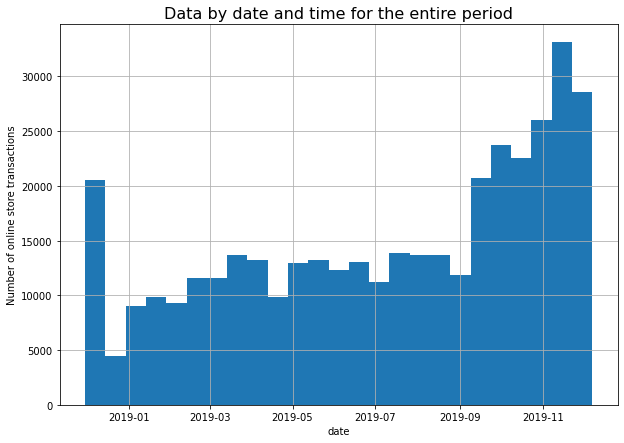

In [30]:
plt.figure(figsize=(10,7)) 
plt.title('Data by date and time for the entire period', fontsize=16)
df['datetime'].hist(bins=25, grid=True) #color='#FF7F50'
plt.xticks(rotation=0)
plt.xlabel('date')
plt.ylabel('Number of online store transactions')
plt.show()

#### conclusion
Judging by the histogram, we have data from 2018-11-29 to 2019-12-07, which is 1 year and 8 days. The peak is in December 2019. There is a slight seasonality in sales.

Looking for anomalies in the order dates

In [31]:
order_multiple_dates = df.groupby('InvoiceNo').agg({'date':'nunique'})\
                      .sort_values(by='date', ascending=False).query('date > 1')
print('Number of orders that belong to several dates at once: {} orders'.format(len(order_multiple_dates)))

Number of orders that belong to several dates at once: 0 orders


In [32]:
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')


## 2.2. Let's look at the activity of buyers, and also build graphs of changes in metrics over time. Let's look for anomalous buyers with an anomalous number of orders.

First, let's look for anomalous buyers with an anomalous number of orders, if there are any, it will be necessary to remove them. Then we will look at the activity of buyers in the online store.

In [33]:
customers_total = len(df['CustomerID'].unique())
print("Total buyers for the entire period: {} people".format(customers_total))

Total buyers for the entire period: 4303 people


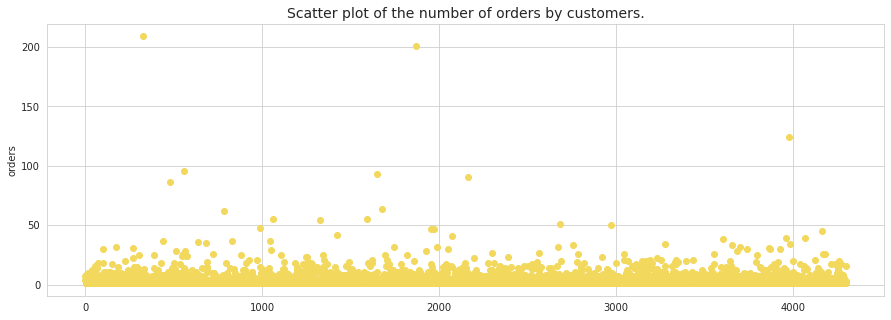

,CustomerID,orders
325,12748.0,209
1868,14911.0,201
3981,17841.0,124
558,13089.0,96
1651,14606.0,93
...,...,...
2827,16216.0,1
2826,16215.0,1
1032,13751.0,1
2824,16213.0,1


In [34]:
orders_per_customer = df.groupby('CustomerID', as_index=False).agg({'InvoiceNo':'nunique'})
orders_per_customer.columns = ['CustomerID','orders']


x_values = pd.Series(range(0,len(orders_per_customer)))

sns.set_style('whitegrid')
plt.figure(figsize=(15,5))
plt.scatter(x_values, orders_per_customer['orders'], color='#F2D95D')   
plt.ylabel('orders')
plt.title('Scatter plot of the number of orders by customers.', fontsize=14)
plt.show()
orders_per_customer.sort_values(by='orders',ascending=False)


Most buyers made only 1 order. There are very few customers who ordered 3 orders. There are also users who made 93, 124 and 209 orders, which seems very strange. They may well be anomalous.

In [35]:
percentiles = np.percentile(orders_per_customer['orders'], [95, 99])
print('95th percentile of orders per customer: {} orders'.format(percentiles[0]))
print('99th percentile of orders per customer: {:.1f} orders'.format(percentiles[1]))

95th percentile of orders per customer: 13.0 orders
99th percentile of orders per customer: 30.0 orders


No more than 5% of the client made more than 13 orders. And no more than 1% of customers - more than 30 orders. It is reasonable to choose 3 orders per client for the lower limit of the number of orders, and weed out anomalous clients according to it.

In [36]:
abnormal_customers = pd.concat([orders_per_customer[orders_per_customer['orders']>30]['CustomerID']], axis = 0)
print('Total anomalous buyers: {} people'.format(len(abnormal_customers)))

Total anomalous buyers: 39 people


In [37]:
df = df.query('CustomerID not in @abnormal_customers')

customers = len(df['CustomerID'].unique())
print("Total buyers for the entire period after filtering: {} people".format(customers))

Total buyers for the entire period after filtering: 4264 people


## Let's look at the activity of buyers, and also build graphs of changes in metrics over time.
**Active shoppers are viewed in three dimensions:**

- DAU (daily active users) 
- WAU weekly active users) 
- MAU (monthly active users) 

Let's calculate the metrics. Let's group the data by unique customers and find the average. Then we will build graphs for changing metrics over time.



In [38]:
dau = df.groupby('date').agg({'CustomerID': 'nunique'}).mean()
wau = df.groupby(['year', 'week']).agg({'CustomerID': 'nunique'}).mean()
mau = df.groupby(['year', 'month']).agg({'CustomerID': 'nunique'}).mean()

print('Average number of unique buyers per day: {} people'.format(int(dau)))
print('Average number of unique buyers per week: {} people'.format(int(wau)))
print('Average number of unique buyers per month: {} people'.format(int(mau)))

Average number of unique buyers per day: 48 people
Average number of unique buyers per week: 273 people
Average number of unique buyers per month: 887 people


In [39]:
sticky_wau = (dau / wau) * 100
sticky_mau = (dau / mau) * 100
print('Weekly Audience: {:.1f}'.format(sticky_wau[0]))
print('Monhtly Audience: {:.1f}'.format(sticky_mau[0]))

Weekly Audience: 17.8
Monhtly Audience: 5.5


According to the results, the indicators are low, it is obvious that the online store is accessed infrequently.


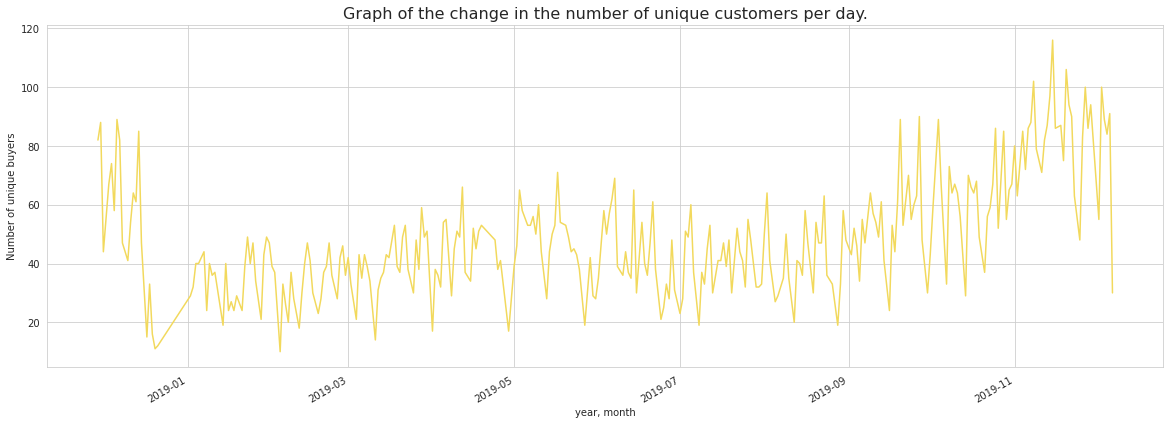

In [40]:
df.groupby(['date']).agg({'CustomerID': 'nunique'}) \
         .plot(figsize=(20,7), grid=True, legend=False, color='#F2D95D')
plt.title('Graph of the change in the number of unique customers per day.', fontsize=16)
plt.xlabel('year, month')
plt.ylabel('Number of unique buyers')
plt.show()

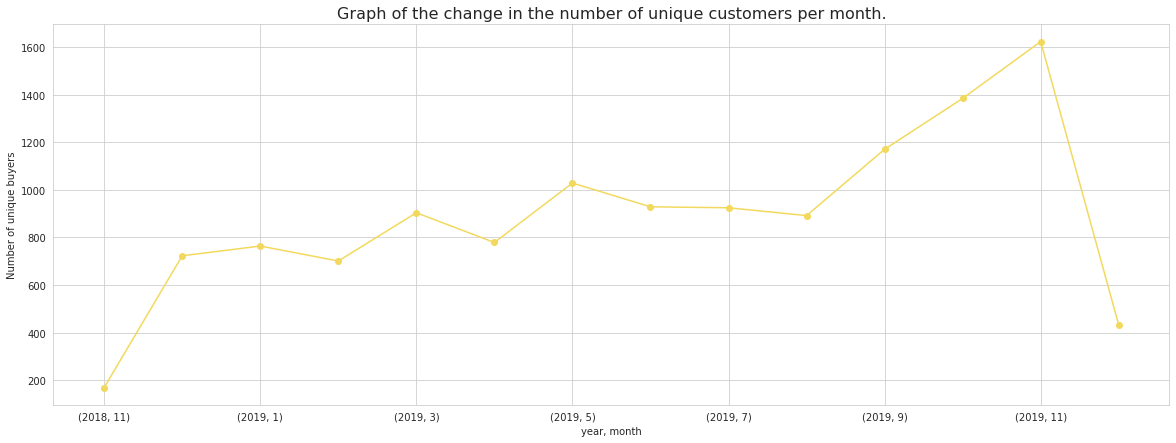

In [41]:
df.groupby(['year', 'month']).agg({'CustomerID': 'nunique'}) \
      .plot(marker='o', figsize=(20,7), grid=True, legend=False, color='#F2D95D')
plt.title('Graph of the change in the number of unique customers per month.', fontsize=16)
plt.xlabel('year, month')
plt.ylabel('Number of unique buyers')
plt.show()

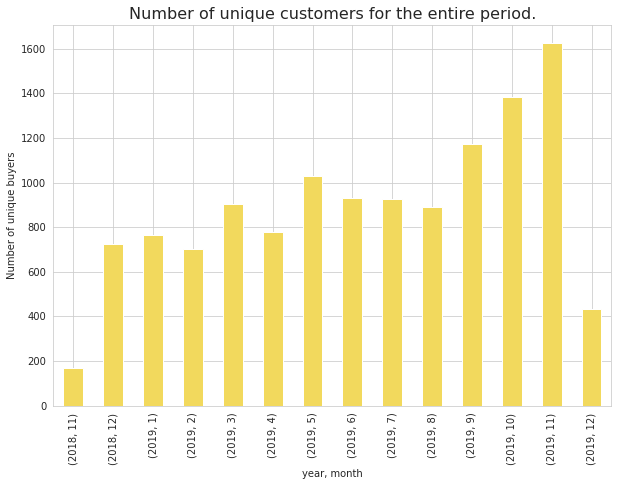

In [42]:
customers_per_month = df.pivot_table(index=['year','month'],values='CustomerID',aggfunc='nunique')\
                               
customers_per_month.columns = ['customers']
customers_per_month.plot(kind='bar', figsize=(10,7), grid=True, y=['customers'], color='#F2D95D', legend=False)

plt.title('Number of unique customers for the entire period.', fontsize=16)
plt.xlabel('year, month')
plt.ylabel('Number of unique buyers')
plt.show()

#### conclussion


    - In total there are 4264 buyers in the log.
    - Most buyers made only 1 order.
    - There are very few buyers who ordered 3 orders.
    - Average number of unique buyers per day: 48 people.
    - Average number of unique buyers per week: 273 people.
    - Average number of unique buyers per month: 887 people.
    - Weekly Audience: 17.7%
    - Monthly Audience: 5.5%
The average number of unique buyers per month is 887 people. This is a small number. It can be seen from the "sticky factor" metric, its indicators are low, it is obvious that the online store is rarely accessed.

Based on the graphs obtained, from November 2018 till November 2019 there is an stedy increase in buyer activity . There is a noticeable decrease in activity from from December2019. Buyers are most active at the end and beginning of the year.

#### 2.3. Let's count how many orders were made by the customers of the online store, and build graphs for changing the number of orders over time.

In [43]:
orders_total = len(df['InvoiceNo'].unique())
print("Total orders for the entire period: {} ".format(orders_total))

Total orders for the entire period: 15935 


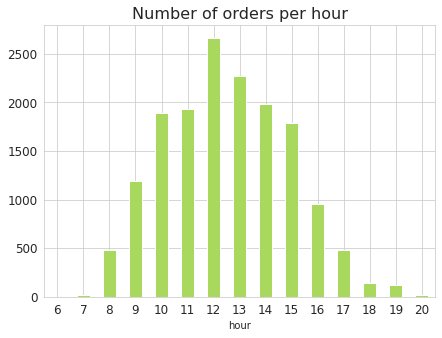

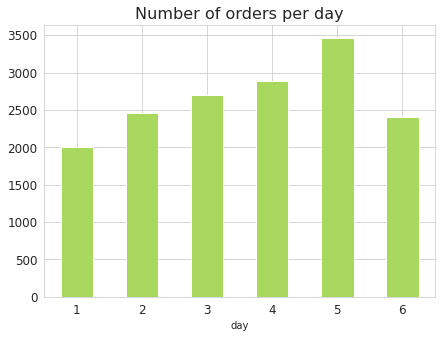

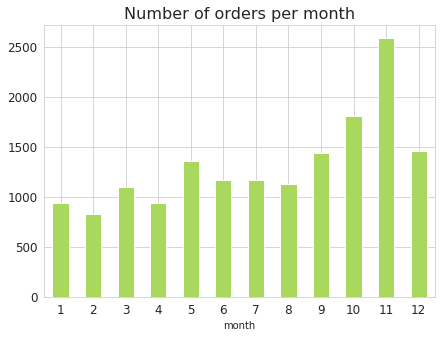

In [44]:
for columns in ['hour', 'day', 'month']:
    df.pivot_table(index=columns, values='InvoiceNo', aggfunc='nunique', fill_value=0)\
    .plot(kind='bar', figsize=(7,5), grid=True, y=['InvoiceNo'], color='#a8d95e', fontsize=12, legend=False)
    plt.title('Number of orders per ' + columns, fontsize=16)
    plt.xticks(rotation=0)
    plt.show()

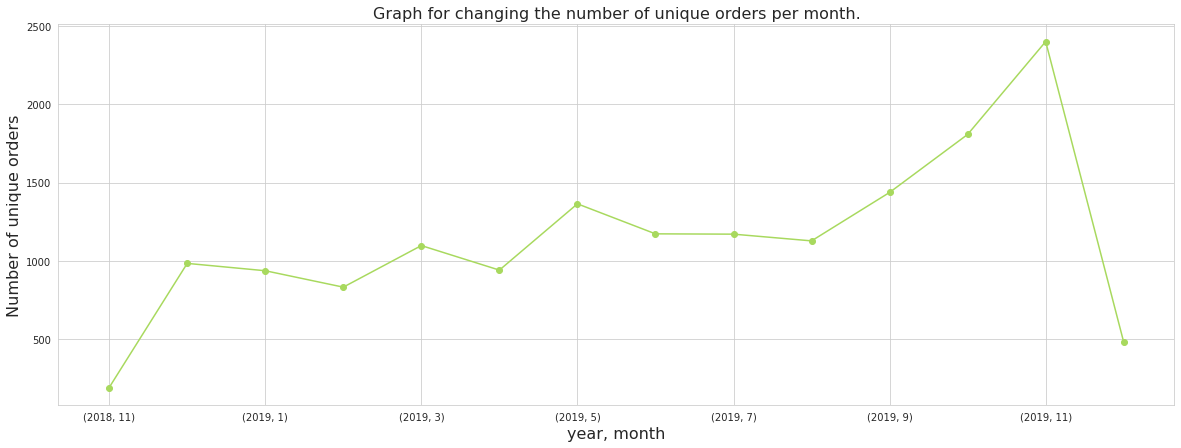

In [45]:
df.groupby(['year', 'month']).agg({'InvoiceNo': 'nunique'}) \
      .plot(marker='o', figsize=(20,7), grid=True, legend=False, color='#a8d95e')
plt.title('Graph for changing the number of unique orders per month.', fontsize=16)
plt.xlabel('year, month', fontsize=16)
plt.ylabel('Number of unique orders', fontsize=16)
plt.show()

orders
year month        
2019 11       2402
     10       1808
     9        1437
     5        1364
     6        1172
     7        1170
     8        1127
     3        1097
2018 12        983
2019 4         940
     1         936
     2         831
     12        479
2018 11        189

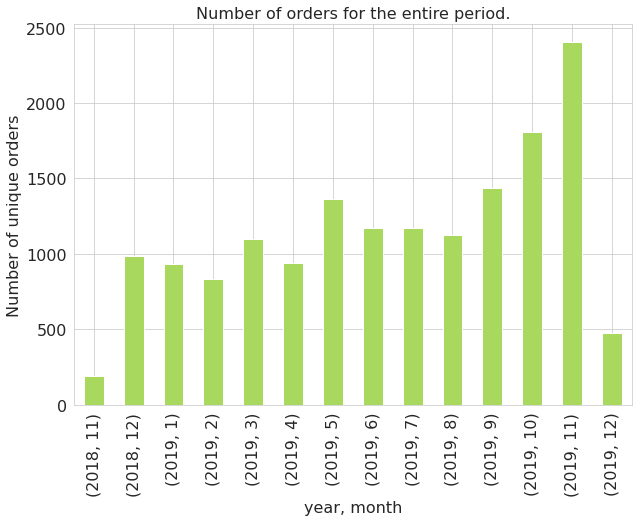

In [46]:
orders_per_month = df.pivot_table(index=['year','month'],values='InvoiceNo',aggfunc='nunique')\
                               
orders_per_month.columns = ['orders']
display(orders_per_month.sort_values(by='orders', ascending=False))

orders_per_month.plot(kind='bar', y=['orders'], figsize=(10,7), grid=True, fontsize=16, color='#a8d95e', legend=False)
plt.title('Number of orders for the entire period.', fontsize=16)
plt.xlabel('year, month', fontsize=16)
plt.ylabel('Number of unique orders', fontsize=16)
plt.show()

#### conclusion
- In the table there are 4264 unique buyers who made 15935 orders in 375 days.
- Most orders are made in the morning from 11 am to 3 pm. The peak is at 12 am. Least of all clients order at night.
- Since Monday, an increase in orders has been seen. The peak falls on Friday, with the highest number of orders. Then we see a decrease, the least ordered on Saturday.
- In November and October 2019, the most orders were made, 2402 and 1808, this is due to the activity of customers. That is, the number of completed orders depends on the activity of buyers.

#### 2.4. Let's look at the revenue from orders. What products of the online store bring the most profit. How does this metric change over time. Find bestsellers for the entire period.


In [47]:
revenue_sum = df['revenue'].sum()
print('Revenue amount: {:.2f}'.format(revenue_sum))

Revenue amount: 6002441.74


In [48]:
revenue_mean = df['revenue'].mean()
print('Average revenue per customer: {:.2f} '.format(revenue_mean))

Average revenue per customer: 17.55 


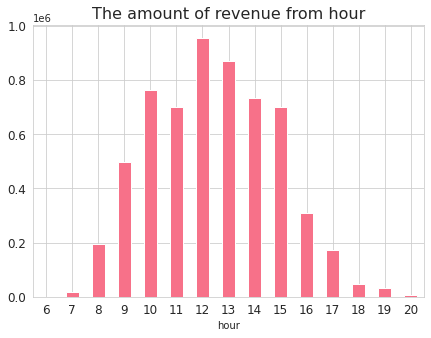

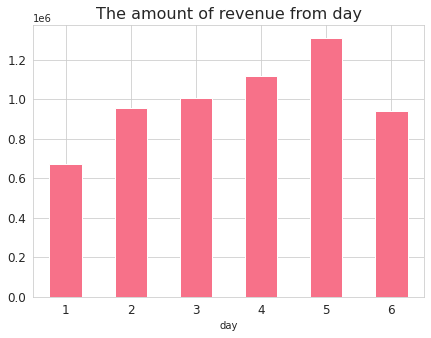

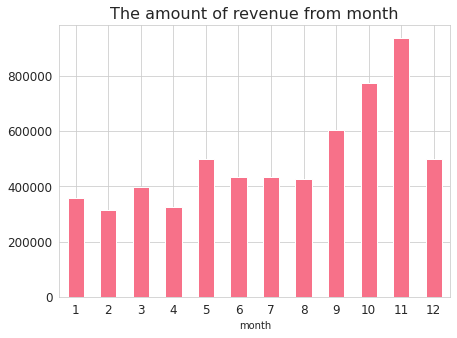

In [49]:
for columns in ['hour', 'day', 'month']:
    df.pivot_table(index=columns, values='revenue', aggfunc='sum', fill_value=0)\
    .plot(kind='bar', figsize=(7,5), grid=True, y=['revenue'], color='#f77189', fontsize=12, legend=False)
    plt.title('The amount of revenue from ' + columns, fontsize=16)
    plt.xticks(rotation=0)
    plt.show()

revenue  avg_revenue
year month                         
2019 11     880017.370    15.733701
     10     774155.820    17.043631
     9      602703.421    17.737527
     5      498797.990    19.703654
     7      435628.481    18.282976
     6      433701.490    19.172516
     8      425029.750    18.383640
     3      397006.060    17.598566
     1      358729.900    17.908736
2018 12     335992.390    17.782079
2019 4      324156.891    16.984904
     2      314337.590    18.547179
     12     164810.960    14.823796
2018 11      57373.630    18.454046

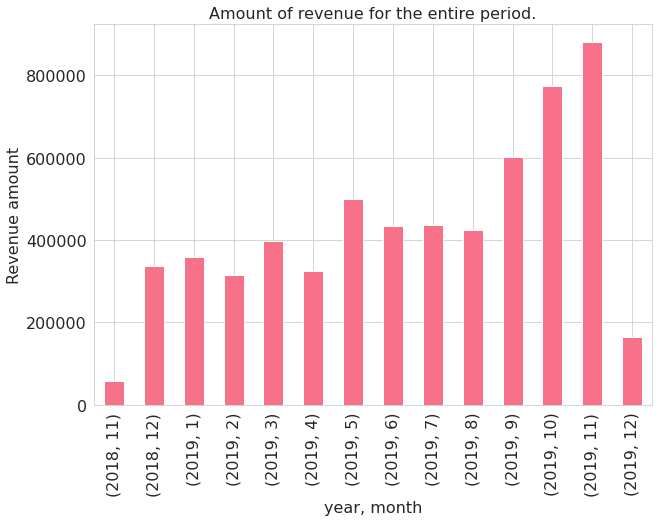

In [50]:

revenue_per_month = df.pivot_table(index=['year','month'],values='revenue',aggfunc=['sum', 'mean'])
revenue_per_month.columns = ['revenue', 'avg_revenue']
display(revenue_per_month.sort_values(by='revenue', ascending=False))

revenue_per_month.plot(kind='bar', y=['revenue'], figsize=(10,7), grid=True, color='#f77189', fontsize=16, legend=False)
plt.title('Amount of revenue for the entire period.', fontsize=16)
plt.xlabel('year, month', fontsize=16)
plt.ylabel('Revenue amount', fontsize=16)
plt.show()

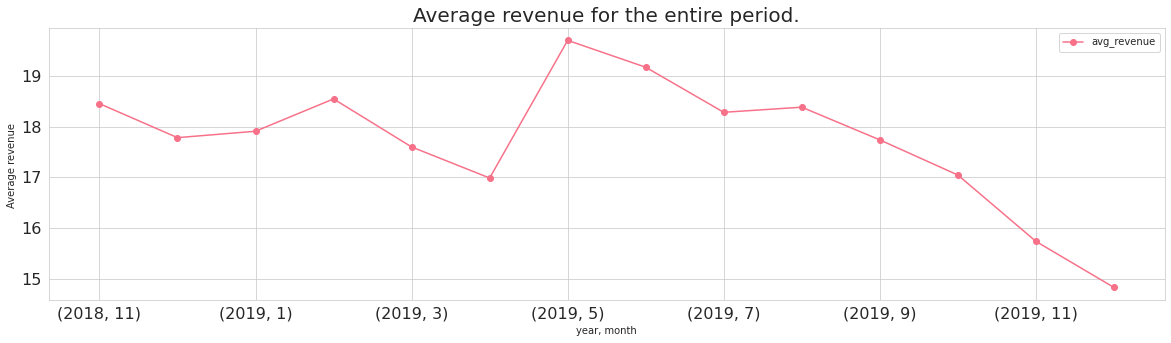

In [51]:

avg_revenue_per_month = df.pivot_table(index=['year','month'],values='revenue',aggfunc='mean')
avg_revenue_per_month.columns = ['avg_revenue']
avg_revenue_per_month.sort_values(by='avg_revenue', ascending=False)

avg_revenue_per_month.plot(marker='o', y=['avg_revenue'], figsize=(20,5), grid=True, color='#f77189', fontsize=16)
plt.title('Average revenue for the entire period.', fontsize=20)
plt.xlabel('year, month')
plt.ylabel('Average revenue ')
plt.show()

,year,month,revenue,customers,orders,revenue_per_customer,revenue_per_order
11,2019,10,774155.820,1385,1808,558.957271,428.183529
10,2019,9,602703.421,1171,1437,514.691222,419.417830
2,2019,1,358729.900,764,936,469.541754,383.258440
3,2019,2,314337.590,701,831,448.413110,378.264248
9,2019,8,425029.750,892,1127,476.490751,377.133762
8,2019,7,435628.481,925,1170,470.949709,372.332035
7,2019,6,433701.490,929,1172,466.847675,370.052466
12,2019,11,880017.370,1624,2402,541.882617,366.368597
6,2019,5,498797.990,1029,1364,484.740515,365.687676
4,2019,3,397006.060,904,1097,439.165996,361.901604


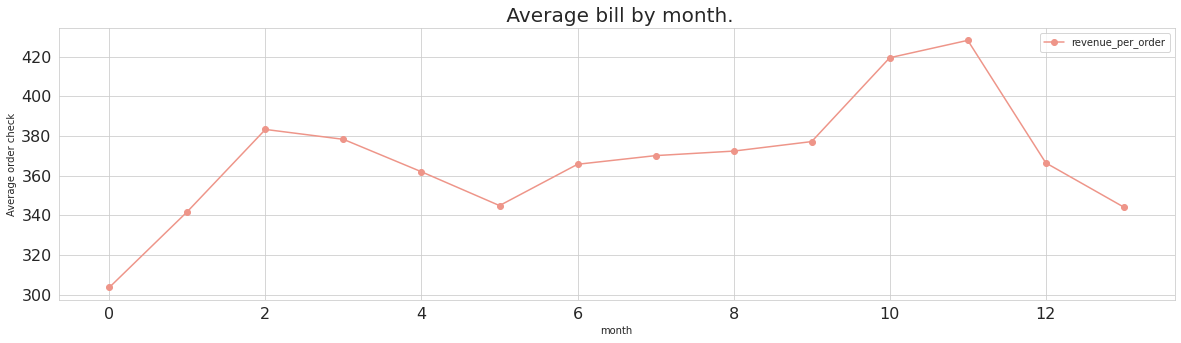

In [52]:
avg_check = df.groupby(['year','month']) \
                                    .agg({'revenue':'sum','CustomerID':'nunique', 'InvoiceNo':'nunique'}).reset_index()
avg_check.columns = ['year', 'month', 'revenue', 'customers', 'orders'] # переименуем столбцы 
avg_check['revenue_per_customer'] = avg_check['revenue'] / avg_check['customers']

avg_check['revenue_per_order'] = avg_check['revenue'] / avg_check['orders']

display(avg_check.sort_values(by='revenue_per_order',ascending=False))

avg_check.plot(marker='o', y=['revenue_per_order'], figsize=(20,5), grid=True, color='#ee9589', fontsize=16)
plt.title(' Average bill by month.', fontsize=20)
plt.xlabel('month')
plt.ylabel('Average order check')
plt.show()

#### conclusions
- Amount of revenue:  6,002,441.
- Average revenue per customer: 17.55
- Day of the week is Friday at 12:00 is the most productive, brings the most revenue.
- During the entire period of 2018-2019 there is a negative trend in total sales revenue. The total amount of revenue at the May2019 began decresing  till the end of the year. Perhaps the reason could be a general deterioration in business conditions.
- There is increse in sales revenue . In Novenber 2018, the average buyer's check was 339.48, and a year later, in November 2019, it was  541.88

#### Which products of the online store bring the most profit. Find bestsellers for the entire period.


,Description,revenue
0,regency cakestand 3 tier,97388.35
1,postage,66192.21
2,white hanging heart t-light holder,55015.16
3,party bunting,51521.58
4,jumbo bag red retrospot,44267.87


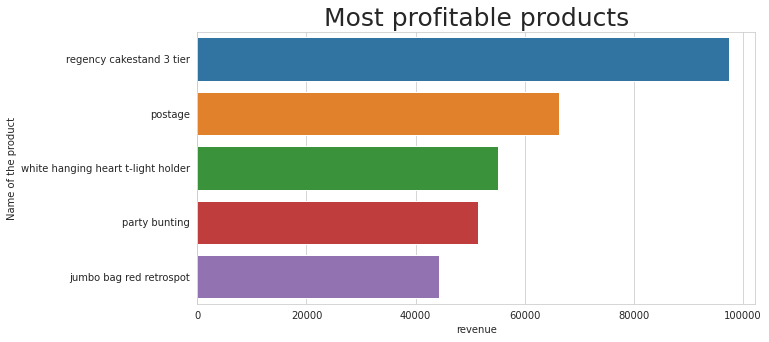

In [53]:
most_profit_products = df.pivot_table(index=['Description'], values='revenue', aggfunc='sum')\
                               .sort_values(by='revenue', ascending=False).reset_index()
display(most_profit_products.head(5))
plt.figure(figsize=(10,5))
plt.title('Most profitable products', fontsize=25) #alpha=.80
sns.barplot(x='revenue', y='Description', data=most_profit_products[:5]).set(xlabel='revenue',
                                                                      ylabel='Name of the product')
plt.show()

,Description,Quantity
0,jumbo bag red retrospot,22971
1,world war 2 gliders asstd designs,20575
2,white hanging heart t-light holder,19996
3,assorted colour bird ornament,19661
4,pack of 72 retrospot cake cases,18502


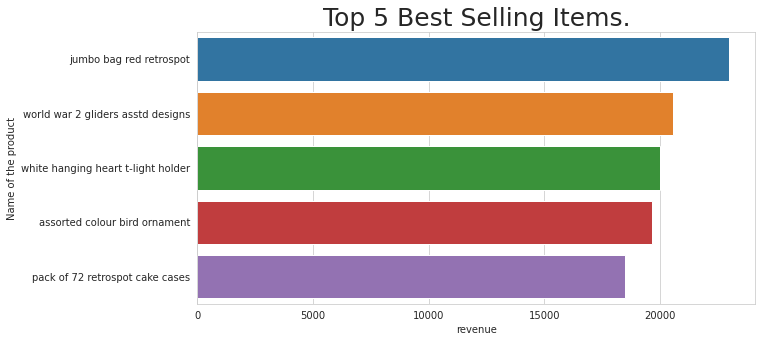

In [54]:
all_time_best_sellers = df.pivot_table(index=['Description'],\
                                                   values='Quantity',\
                                                   aggfunc='sum').sort_values(by='Quantity',ascending=False).reset_index()
display(all_time_best_sellers.head())

plt.figure(figsize=(10,5))
plt.title('Top 5 Best Selling Items.', fontsize=25) #alpha=.80
sns.barplot(x='Quantity',y='Description',data=all_time_best_sellers[:5]).set(xlabel='revenue',
                                                                      ylabel='Name of the product')
plt.show()

#### Findings
**Top 5 most profitable products for the entire period**

    - regency cakestand 3 tier	
    - postage	
    - white hanging heart t-light holder
	- party bunting	
	- jumbo bag red retrospot	


**Top 5 best-selling products of the entire period**

	- jumbo bag red retrospot	
	- world war 2 gliders asstd designs	
	- white hanging heart t-light holder	
	- assorted colour bird ornament	
	- pack of 72 retrospot cake cases	

#### 2.5. Let's build a correlation matrix.

To identify correlating features in the dataframe, we will build a correlation matrix using the .corr() method


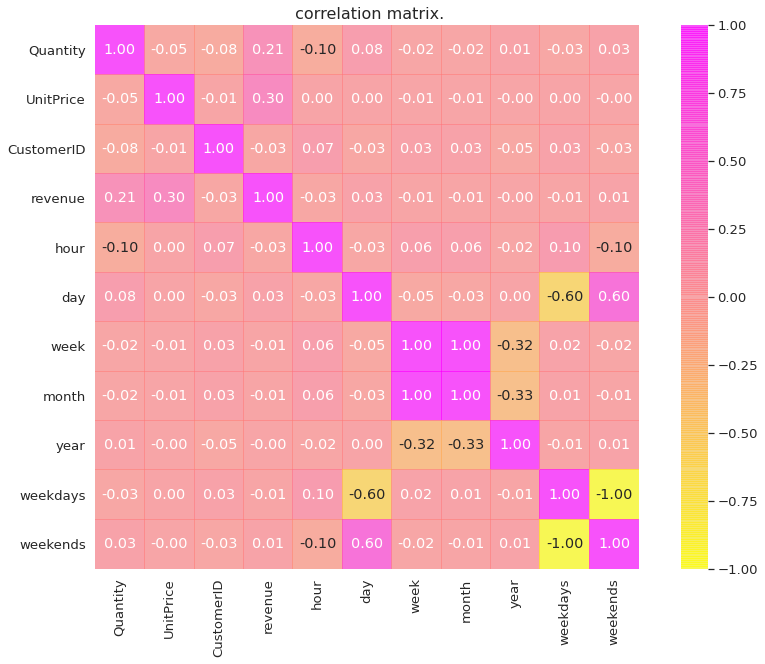

In [55]:

plt.figure(figsize=(15,10))
sns.set(font_scale=1.2)
sns.heatmap(data=df.corr(), annot=True, square=True, alpha=.65, fmt='.2f', cmap='spring_r') 
plt.title(' correlation matrix.', fontsize=16)
plt.show()

#### conclussion
There is a logical interdependence between the variables. There is a slight correlation of revenue with the price of the product, corr = 0.30, that is, the higher the price of the product, the greater the revenue

## Step 3. Categorize the product name

## 3.1. Lemmatization.

In [56]:
unique_product = df['Description'].unique() 


m = Mystem()
string = '; '.join(unique_product) 
lemmas = m.lemmatize(string) 
print(Counter(lemmas)) 

Counter({' ': 12513, '; ': 3083, ' ; ': 703, 'set': 333, 'pink': 307, 'of': 238, 'heart': 236, 'blue': 225, 'vintage': 214, 'red': 198, '/': 166, 'bag': 160, '  ': 160, 'glass': 160, 'christmas': 148, 'white': 144, 'box': 136, 'design': 126, '-': 119, 'holder': 116, 't': 113, 'small': 113, 'flower': 113, 'metal': 112, 'light': 112, '3': 105, 'large': 101, 'hanging': 101, 'green': 98, 'decoration': 98, 'rose': 98, 'black': 97, 'retrospot': 96, 'wall': 96, 'candle': 95, 'silver': 94, 'necklace': 88, '4': 87, 'paper': 84, '6': 83, 'cake': 83, 'card': 82, 'with': 78, 'and': 77, 'art': 77, 'pack': 70, 'garden': 70, 'in': 70, 'polkadot': 69, 'cover': 69, 'mug': 68, 'bracelet': 68, 'wrap': 67, '12': 65, 'sign': 65, 'ivory': 64, 'star': 59, 'assorted': 58, 'egg': 58, 'love': 57, 'tea': 57, 'mini': 56, 'gift': 53, 'tree': 53, 'bowl': 53, 's': 52, 'cushion': 52, 'zinc': 51, 'mirror': 51, 'cream': 50, 'crystal': 50, 'home': 49, 'frame': 49, 'easter': 48, 'wooden': 47, '2': 46, 'ring': 46, 'w': 45

In [57]:

category_dictionary = {
    'toys':[ 'dolly','lunch box', 'fairy', 'bunny' ,'rabbit', 'childrens' ,'rrevolver'],
    
    'Jewelry': ['earuuings','gold','crystal','silver','vnecklace','ring','charm','bling','trinket',
               'jewelled','beaded','pearl','bead','brass','diamond'],
    
    'Pantry items kitchen':['chocolate','tea','cake','egg','cream','strawberry','coffe','jam','baking','vanilla',
             'cherry','cotage','candy','food','marshmakkow','cracker','baker',
             'mushrooms', 'salts', 'herbs','truffle','pear','snack','biscuit',
             'spatula','jar','tray','holder','mug','bottle','cup','pot', 
             'basket','pan','trays','sauser'
],
    
    'Home decoration and':['home','doormat','candles','knob','mirror','wall','garden','frame ','drawer','table', 
              'kitchen','lantern','door','hanger','tissues','scented','bathroom', 'umbrella', 'picture', 'livingroom',
                           'chime', 'wood','letter'],
    
   
}

In [58]:
def categorize_product(product):
    """ 
    Returns the category by the value 'product' in the dataset 'ecommerce',
    using a dictionary with categories 'category_dictionary'.
    """ 
    for category, items_of_list in category_dictionary.items():
        for item in items_of_list:
            if item in product:
                return category
            
    return category

In [59]:
df['category'] = df['Description'].apply(categorize_product)
display(df.shape)
df.sample(10)

(341961, 17)

,InvoiceNo,StockCode,Description,Quantity,datetime,UnitPrice,CustomerID,revenue,hour,day,week,month,year,date,weekdays,weekends,category
349371,577594,21588,retrospot giant tube matches,12,2019-11-18 16:07:00,2.55,13142.0,30.60,16,1,47,11,2019,2019-11-18,1,0,Pantry items kitchen
204391,562939,22173,metal 4 hook hanger french chateau,8,2019-08-09 08:37:00,2.95,15498.0,23.60,8,5,32,8,2019,2019-08-09,1,0,Pantry items kitchen
20884,539098,22907,pack of 20 napkins pantry design,12,2018-12-14 10:28:00,0.85,14841.0,10.20,10,5,50,12,2018,2018-12-14,1,0,Pantry items kitchen
259914,569020,22271,feltcraft doll rosie,6,2019-09-28 09:39:00,2.95,15321.0,17.70,9,6,39,9,2019,2019-09-28,0,1,Home decoration and
226483,565587,22795,sweetheart recipe book stand,4,2019-09-03 13:38:00,6.75,12727.0,27.00,13,2,36,9,2019,2019-09-03,1,0,Home decoration and
334682,576189,22604,set of 4 napkin charms cutlery,2,2019-11-12 11:33:00,2.55,14684.0,5.10,11,2,46,11,2019,2019-11-12,1,0,Jewelry
286619,571544,22682,french blue metal door sign 7,3,2019-10-15 16:53:00,1.25,17757.0,3.75,16,2,42,10,2019,2019-10-15,1,0,Home decoration and
357765,578362,35953,folkart star christmas decorations,48,2019-11-22 10:39:00,0.39,12913.0,18.72,10,5,47,11,2019,2019-11-22,1,0,Home decoration and
128340,553211,22821,gift bag psychedelic apples,12,2019-05-14 09:40:00,0.65,15358.0,7.80,9,2,20,5,2019,2019-05-14,1,0,Home decoration and
269387,569844,23247,biscuit tin 50's christmas,6,2019-10-04 13:30:00,2.89,12626.0,17.34,13,5,40,10,2019,2019-10-04,1,0,Pantry items kitchen


In [60]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
datetime       0
UnitPrice      0
CustomerID     0
revenue        0
hour           0
day            0
week           0
month          0
year           0
date           0
weekdays       0
weekends       0
category       0
dtype: int64

In [61]:
df['category'].unique()

array(['Home decoration and', 'Pantry items kitchen', 'toys', 'Jewelry'],
      dtype=object)

In [62]:
category_ecommerce = df.groupby('category').agg({'Description':'count'}).reset_index()
category_ecommerce.columns = ['category', 'products']
category_ecommerce['ratio'] = ((category_ecommerce['products'] / len(df))*100).round(1).astype('str')+'%'
display(category_ecommerce.sort_values(by='products', ascending = False))

,category,products,ratio
0,Home decoration and,209192,61.2%
2,Pantry items kitchen,99181,29.0%
3,toys,18304,5.4%
1,Jewelry,15284,4.5%


#### Conclusion
The largest share of the product range is occupied by the "Home decoration and" - 61% of the total product range, it can be called the main one. This category includes all that connect with home decoretion and improvment . Then comes the category "Pantry items kitchen" 29%, "toys" 5.4%, "Jewelry" 4.5%.

##  Step 4. Analysis of the product range

#### 4.1. Top 5 best-selling products in each category by number of orders for the entire period.

In [63]:
groupby_product = df.groupby('Description')\
                           .agg({'category':'first', 'InvoiceNo':'nunique', 'CustomerID':'nunique', 
                                 'Quantity':'sum', 'revenue':'sum'})\
                           .reset_index().sort_values(by='InvoiceNo', ascending=False)
groupby_product.columns = ['product', 'category', 'orders', 'customers', 'quantity', 'revenue']

# 
for category in groupby_product['category'].unique():
    print()
    display("TOP-5 best-selling products in the category by number of orders: «{}»".format(category))
    display(groupby_product[groupby_product['category']==category].head(5))
    print()

'TOP-5 best-selling products in the category by number of orders: «Pantry items kitchen»'

,product,category,orders,customers,quantity,revenue
3652,white hanging heart t-light holder,Pantry items kitchen,1752,834,19996,55015.16
2727,regency cakestand 3 tier,Pantry items kitchen,1490,857,8350,97388.35
1741,jumbo bag red retrospot,Pantry items kitchen,1336,604,22971,44267.87
1921,lunch bag red retrospot,Pantry items kitchen,1130,511,13533,21767.85
2958,set of 3 cake tins pantry design,Pantry items kitchen,1033,622,5003,23901.41


'TOP-5 best-selling products in the category by number of orders: «Home decoration and»'

,product,category,orders,customers,quantity,revenue
214,assorted colour bird ornament,Home decoration and,1249,653,19661,33227.09
2316,party bunting,Home decoration and,1237,686,11210,51521.58
2576,postage,Home decoration and,1017,323,2912,66192.21
1913,lunch bag black skull.,Home decoration and,934,440,8974,14521.50
2285,paper chain kit 50's christmas,Home decoration and,906,597,11326,31535.18


'TOP-5 best-selling products in the category by number of orders: «toys»'

,product,category,orders,customers,quantity,revenue
2616,rabbit night light,toys,717,434,12683,24289.12
3272,spaceboy lunch box,toys,610,311,6230,11879.04
107,60 teatime fairy cake cases,toys,576,391,10061,5290.09
981,dolly girl lunch box,toys,543,278,4858,9326.14
1918,lunch bag dolly girl design,toys,541,301,4903,7911.39


'TOP-5 best-selling products in the category by number of orders: «Jewelry»'

,product,category,orders,customers,quantity,revenue
101,6 ribbons rustic charm,Jewelry,651,399,6747,12021.89
2414,pink cream felt craft trinket box,Jewelry,477,296,5005,6319.31
191,antique silver t-light glass,Jewelry,474,329,8992,10834.37
3311,strawberry ceramic trinket box,Jewelry,445,280,6127,7383.71
2397,pink blue felt craft trinket box,Jewelry,413,266,4077,5072.99


#### Conclusion
- In the Pantry items kitchen category, the best-selling product: white hanging heart t-light holder
- In the "home decoration and" category the best-selling item: assorted colour bird ornament	
- In the "toys" category, the best-selling product: rabbit night light	
- In the category "Jewelry" the best-selling product: pink blue felt craft trinket box

#### 4.2. Top 5 most profitable products in each category for the entire period

In [64]:
groupby_product = df.groupby('Description')\
                           .agg({'category':'first', 'InvoiceNo':'nunique', 'CustomerID':'nunique', 
                                 'Quantity':'sum', 'revenue':'sum'})\
                           .reset_index().sort_values(by='revenue', ascending=False)
groupby_product.columns = ['product', 'category', 'orders', 'customers', 'quantity', 'revenue']

for category in groupby_product['category'].unique():
    print()
    display("TOP-5 best-selling products in the category by number of orders: «{}»".format(category))
    display(groupby_product[groupby_product['category']==category].head(5))
    print()

'TOP-5 best-selling products in the category by number of orders: «Pantry items kitchen»'

,product,category,orders,customers,quantity,revenue
2727,regency cakestand 3 tier,Pantry items kitchen,1490,857,8350,97388.35
3652,white hanging heart t-light holder,Pantry items kitchen,1752,834,19996,55015.16
1741,jumbo bag red retrospot,Pantry items kitchen,1336,604,22971,44267.87
2365,picnic basket wicker 60 pieces,Pantry items kitchen,2,1,61,39619.50
3280,spotty bunting,Pantry items kitchen,901,554,5511,26203.45


'TOP-5 best-selling products in the category by number of orders: «Home decoration and»'

,product,category,orders,customers,quantity,revenue
2576,postage,Home decoration and,1017,323,2912,66192.21
2316,party bunting,Home decoration and,1237,686,11210,51521.58
1961,manual,Home decoration and,215,187,1307,38338.81
214,assorted colour bird ornament,Home decoration and,1249,653,19661,33227.09
2285,paper chain kit 50's christmas,Home decoration and,906,597,11326,31535.18


'TOP-5 best-selling products in the category by number of orders: «toys»'

,product,category,orders,customers,quantity,revenue
2616,rabbit night light,toys,717,434,12683,24289.12
3272,spaceboy lunch box,toys,610,311,6230,11879.04
695,childrens cutlery polkadot pink,toys,287,193,2403,9522.75
981,dolly girl lunch box,toys,543,278,4858,9326.14
2925,set of 10 led dolly lights,toys,322,263,1495,8698.24


'TOP-5 best-selling products in the category by number of orders: «Jewelry»'

,product,category,orders,customers,quantity,revenue
101,6 ribbons rustic charm,Jewelry,651,399,6747,12021.89
2826,rotating silver angels t-light hldr,Jewelry,264,183,4756,11549.47
191,antique silver t-light glass,Jewelry,474,329,8992,10834.37
3311,strawberry ceramic trinket box,Jewelry,445,280,6127,7383.71
3719,wooden school colouring set,Jewelry,356,278,3933,6455.97


#### Conclusion
- In the Pantry items kitchen category, the best-selling product: regency cakestand 3 tier	
- In the  "home decoration and" category the best-selling item: postage	
- In the "toys" category, the best-selling product: rabbit night light	
- In the category "Jewelry" the best-selling product: 6 ribbons rustic charm	

#### 4.3. Calculate the revenue and the number of buyers by category.

In [65]:
groupby_category = df.groupby('category').agg({'revenue':'sum', 'date':'max', 'InvoiceNo':'nunique',
                                                      'CustomerID':'nunique', 'Quantity':'sum'})
groupby_category.columns = ['revenue', 'date', 'orders', 'customers', 'quantity'] 

# Let's find the average check of the buyer revenue_per_customer — we will divide the indicator revenue by customers.
groupby_category['revenue_per_customer'] = groupby_category['revenue'] / groupby_category['customers']

# let's Find the average order receipt revenue_per_order — divide the revenue by orders.
groupby_category['revenue_per_order'] = groupby_category['revenue'] / groupby_category['orders']
groupby_category = groupby_category.sort_values(by='revenue', ascending = False)

# let's Find the ratio of revenue, customers, orders from their total number. 
groupby_category['ratio_revenue'] = ((groupby_category['revenue'] / groupby_category['revenue'].sum())* 100)\
                                                                                    .round(1).astype('str')+'%'
groupby_category['ratio_customer']= ((groupby_category['customers'] / groupby_category['customers'].sum())* 100)\
                                                                                     .round(1).astype('str')+'%'
groupby_category['ratio_order']= ((groupby_category['orders'] / groupby_category['orders'].sum())* 100)\
                                                                                     .round(1).astype('str')+'%'
display(groupby_category)

,revenue,date,orders,customers,quantity,revenue_per_customer,revenue_per_order,ratio_revenue,ratio_customer,ratio_order
category,,,,,,,,,,
Home decoration and,3557881.063,2019-12-07,15264,4188,2008509,849.541801,233.089692,59.3%,30.4%,35.6%
Pantry items kitchen,1928880.190,2019-12-07,13879,4032,906823,478.392904,138.978326,32.1%,29.2%,32.3%
toys,278127.420,2019-12-07,6853,2667,170348,104.284747,40.584769,4.6%,19.3%,16.0%
Jewelry,237553.070,2019-12-07,6926,2906,173046,81.745723,34.298740,4.0%,21.1%,16.1%


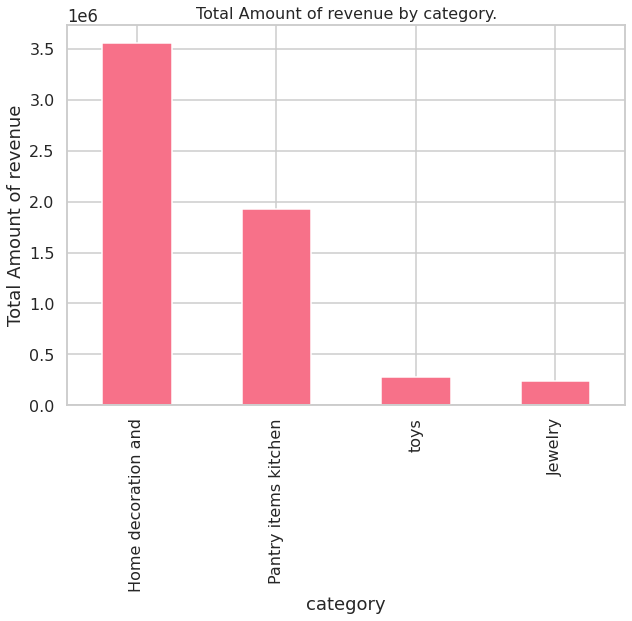

In [66]:

sns.set_style('whitegrid')
sns.set_context('talk')
groupby_category.plot(kind='bar', y=['revenue'], figsize=(10,7), grid=True, color='#f77189', 
                      fontsize=16, legend=False)
plt.title('Total Amount of revenue by category.', fontsize=16)
plt.xlabel('category')
plt.ylabel('Total Amount of revenue')
plt.show()

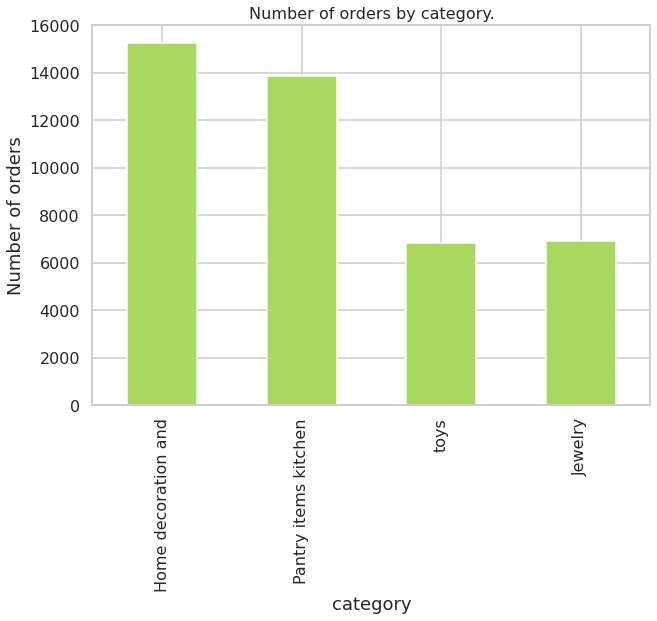

In [67]:
 
sns.set_style('whitegrid')
sns.set_context('talk')
groupby_category.plot(kind='bar', y=['orders'], figsize=(10,7), grid=True, color='#a8d95e', 
                      fontsize=16, legend=False)
plt.title('Number of orders by category.', fontsize=16)
plt.xlabel('category')
plt.ylabel('Number of orders')
plt.show()

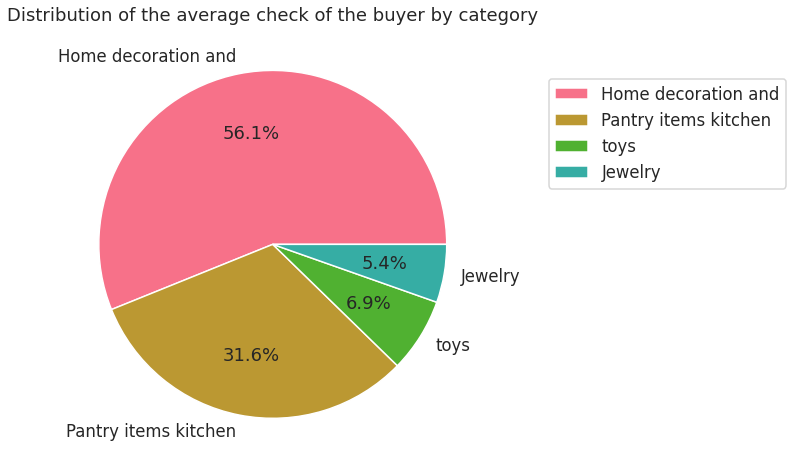

In [68]:

sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_palette('husl')
(groupby_category.sort_values(by='revenue_per_customer', ascending=False)\
                 .plot(kind='pie', y='revenue_per_customer', figsize=(8, 8), autopct='%1.1f%%', pctdistance=0.65)\
                 .set(ylabel=''))
plt.title('Distribution of the average check of the buyer by category', fontsize=18)
plt.legend(bbox_to_anchor=(1.7, -0.1, 0, 1))
plt.show()

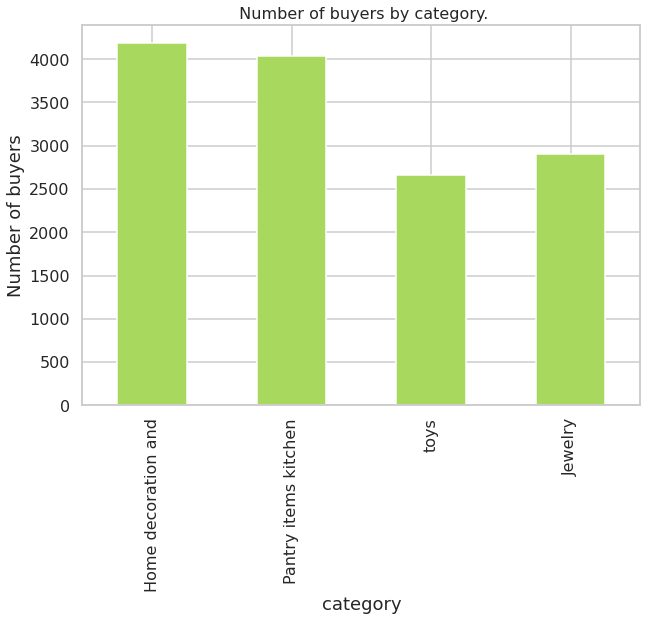

In [69]:
sns.set_style('whitegrid')
sns.set_context('talk')
groupby_category.plot(kind='bar', y=['customers'], figsize=(10,7), grid=True, color='#a8d95e', 
                      fontsize=16, legend=False)
plt.title(' Number of buyers by category.', fontsize=16)
plt.xlabel('category')
plt.ylabel('Number of buyers')
plt.show()

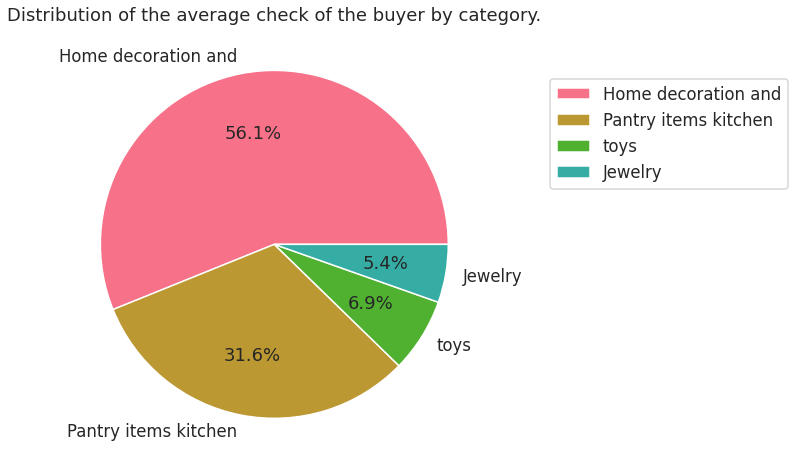

In [70]:
sns.set_style('whitegrid')
sns.set_context('talk')
sns.set_palette('husl')
(groupby_category.sort_values(by='revenue_per_customer', ascending=False)\
                 .plot(kind='pie', y='revenue_per_customer', figsize=(8, 8), autopct='%1.1f%%', pctdistance=0.65)\
                 .set(ylabel=''))
plt.title('Distribution of the average check of the buyer by category.', fontsize=18)
plt.legend(bbox_to_anchor=(1.7, -0.1, 0, 1))
plt.show()

#### Conclusion
- Looking at the amount of revenue, the most profitable category is “home decoration and”. Less profitable category "jewelary".
- Looking at the number of orders, the best-selling products are in the home decoration and category,confirming that the main product range is in the home decoration and category and the rest are complementary.
- If you look at the average bill, in terms of sales efficiency, then the category "Home decoration and" as the main assortment of goods, gives the largest revenue. Jewelry category gives the lowest revenue we can work with the assortment and its sorting, offering items more expensive than the average bill. Conduct promotions and special offers.
- The main income of the online store is from the categories "Home decoration and", "Pantry items kitchen""cleaning".

#### 4.4. Let's look for the seasonality of goods by category. Let's analyze sales by category by season.

In [71]:
def season(month):
    if  3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'summer'
    elif 9 <= month <= 11:
        return 'autumn'
    else:
        return 'winter'

In [72]:
df['season'] = df['month'].apply(season)
display(df.shape)
df.sample(10)

(341961, 18)

,InvoiceNo,StockCode,Description,Quantity,datetime,UnitPrice,CustomerID,revenue,hour,day,week,month,year,date,weekdays,weekends,category,season
16210,538508,21166,cook with wine metal sign,1,2018-12-10 13:32:00,1.95,15998.0,1.95,13,1,50,12,2018,2018-12-10,1,0,Home decoration and,winter
32754,540979,84406B,cream cupid hearts coat hanger,8,2019-01-10 15:06:00,3.25,15727.0,26.00,15,4,2,1,2019,2019-01-10,1,0,Pantry items kitchen,winter
69125,545658,22197,small popcorn holder,3,2019-03-02 14:13:00,0.85,14670.0,2.55,14,6,9,3,2019,2019-03-02,0,1,Pantry items kitchen,Spring
156482,556942,22367,childrens apron spaceboy design,8,2019-06-13 16:42:00,1.95,14222.0,15.60,16,4,24,6,2019,2019-06-13,1,0,toys,summer
276231,570482,22614,pack of 12 spaceboy tissues,1,2019-10-08 17:00:00,0.39,17459.0,0.39,17,2,41,10,2019,2019-10-08,1,0,Home decoration and,autumn
104388,550164,20725,lunch bag red retrospot,10,2019-04-12 16:31:00,1.65,13590.0,16.50,16,5,15,4,2019,2019-04-12,1,0,Pantry items kitchen,Spring
22418,539333,21985,pack of 12 hearts design tissues,24,2018-12-15 09:52:00,0.29,13627.0,6.96,9,6,50,12,2018,2018-12-15,0,1,Home decoration and,winter
189424,561099,84378,set of 3 heart cookie cutters,3,2019-07-23 11:01:00,1.25,14100.0,3.75,11,2,30,7,2019,2019-07-23,1,0,Home decoration and,summer
45946,542733,22487,white wood garden plant ladder,1,2019-01-29 15:35:00,9.95,15058.0,9.95,15,2,5,1,2019,2019-01-29,1,0,Home decoration and,winter
164174,557955,84970S,hanging heart zinc t-light holder,12,2019-06-21 18:59:00,0.85,16175.0,10.20,18,5,25,6,2019,2019-06-21,1,0,Pantry items kitchen,summer


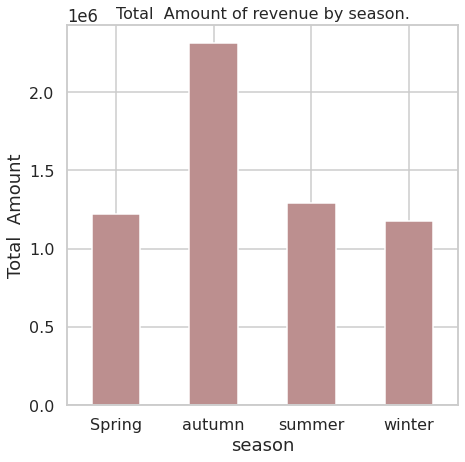

In [73]:
df.groupby(['season']).agg({'revenue': 'sum'})\
                .plot(kind='bar', y=['revenue'], figsize=(7,7), grid=True, color='#BC8F8F', fontsize=16, legend=False)\
                
plt.title('Total  Amount of revenue by season.', fontsize=16)
plt.xlabel('season')
plt.ylabel('Total  Amount')
plt.xticks(rotation=0)
plt.show()

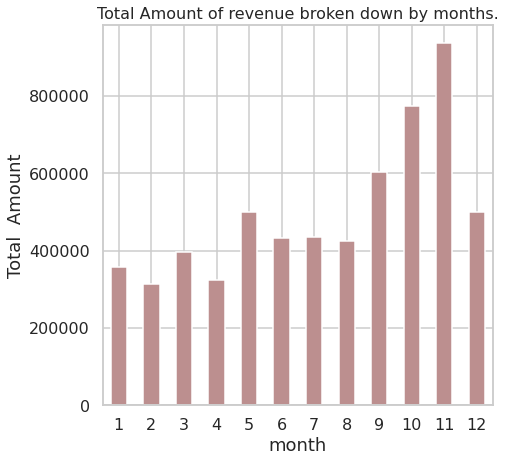

In [74]:
df.groupby(['month']).agg({'revenue': 'sum'})\
                .plot(kind='bar', y=['revenue'], figsize=(7,7), grid=True, color='#BC8F8F', fontsize=16, legend=False)\
                
plt.title('Total Amount of revenue broken down by months.', fontsize=16)
plt.xlabel('month')
plt.ylabel('Total  Amount')
plt.xticks(rotation=0)
plt.show()

**Let's analyze sales by category by season.**

In [75]:

Pantry_items_kitchen_category = df.query('category == "Pantry items kitchen"')
Home_decoration_and_category = df.query('category == "Home decoration and"')
Jewelry_category = df.query('category == "Jewelry"')
toys_category = df.query('category == "toys"')


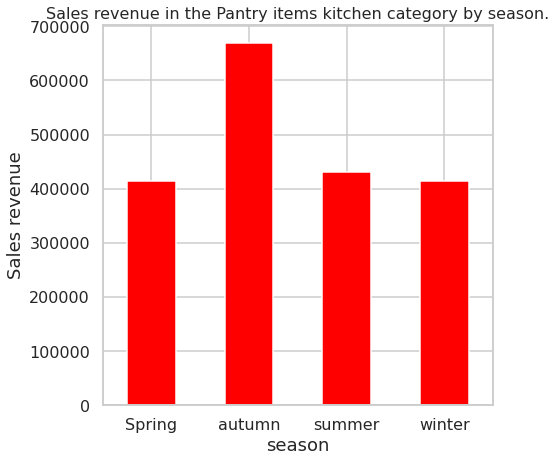

In [76]:

Pantry_items_kitchen_category.groupby(['season']).agg({'revenue': 'sum'})\
                .plot(kind='bar', y=['revenue'], figsize=(7,7), grid=True, color='red', fontsize=16, legend=False)
                
plt.title('Sales revenue in the Pantry items kitchen category by season.', fontsize=16)
plt.xlabel('season')
plt.ylabel('Sales revenue')

plt.xticks(rotation=0)
plt.show()

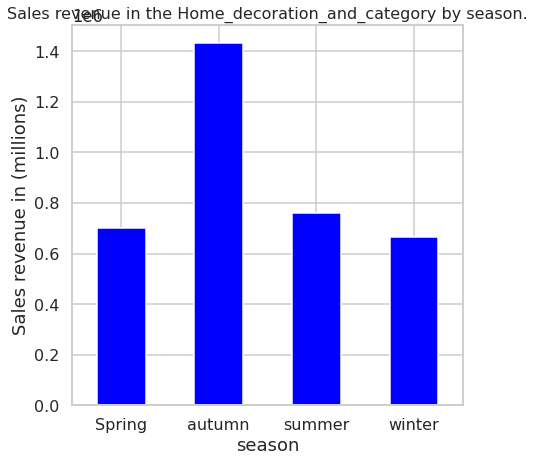

In [77]:
Home_decoration_and_category.groupby(['season']).agg({'revenue': 'sum'})\
                .plot(kind='bar', y='revenue', figsize=(7,7), grid=True, color='blue', fontsize=16, legend=False)
                
plt.title('Sales revenue in the Home_decoration_and_category by season.', fontsize=16)
plt.xlabel('season')
plt.ylabel('Sales revenue in (millions)')
plt.xticks(rotation=0)
plt.show()

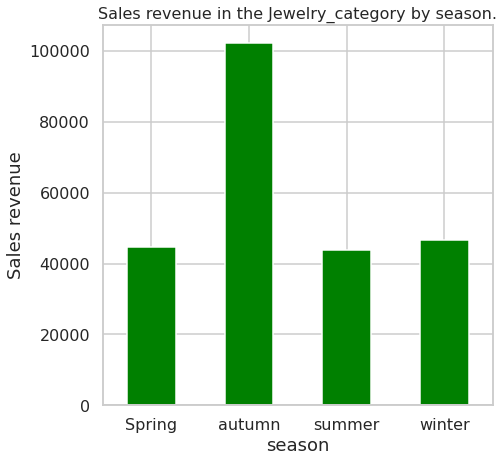

In [78]:
Jewelry_category.groupby(['season']).agg({'revenue': 'sum'})\
                .plot(kind='bar', y=['revenue'], figsize=(7,7), grid=True, color='green', fontsize=16, legend=False)
                
plt.title('Sales revenue in the Jewelry_category by season.', fontsize=16)
plt.xlabel('season')
plt.ylabel('Sales revenue')
plt.xticks(rotation=0)
plt.show()

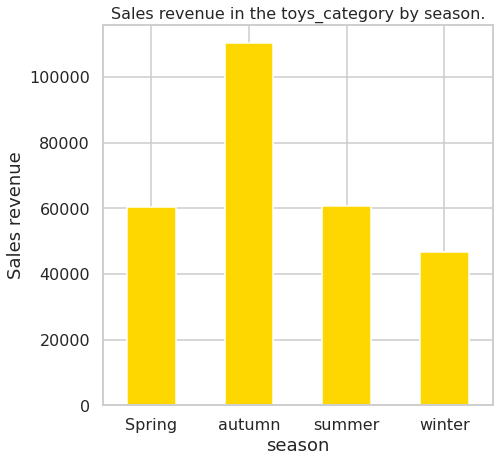

In [79]:
toys_category.groupby(['season']).agg({'revenue': 'sum'})\
                .plot(kind='bar', y=['revenue'], figsize=(7,7), grid=True, color='gold', fontsize=16, legend=False)
                
plt.title('Sales revenue in the toys_category by season.', fontsize=16)
plt.xlabel('season')
plt.ylabel('Sales revenue')
plt.xticks(rotation=0)
plt.show()

#### Conclusion
The amount of revenue, broken down by season, showed that the most profitable period is the autumn period. That is, the largest sales volumes fall on the forth quarters of the year. All the others season have the same amount of income . Broken down by month, it's more illustrative. 


After analyzing sales by category by season, the following division into periods by income from categories is observed:

 - The autumn period, profitable in all categories all other periods are almost the same in all categories
 

## 5. Segmentation of buyers based on their purchase history
To segment buyers, it is necessary to carry out clustering. Clustering can help differentiate buyers and offer each segment the right product option and accurate communication. To do this, it is necessary to calculate the matrix of distances between all features using the linkage class.

#### 5.1. Let's build a distance matrix using the linkage() function on a standardized feature matrix and draw a dendrogram.

In [80]:
# Let's carry out clustering. We leave only quantitative data.
clusters_data = df.pivot_table(index = 'Description', aggfunc = {'InvoiceNo': 'nunique', 'Quantity': 'sum', 
                                                      'UnitPrice': 'mean',  'weekdays': 'sum', 'weekends': 'sum'})
clusters_data.columns = ['orders', 'quantity', 'price', 'weekdays', 'weekends'] 
clusters_data.sample(10)

,orders,quantity,price,weekdays,weekends
Description,,,,,
resin necklace w pastel beads,3,5,7.500000,3,0
wood stamp set flowers,115,699,0.978000,101,14
pantry hook spatula,26,152,2.080000,23,3
cotton apron pantry design,126,513,4.813016,109,17
crochet lilac/red bear keyring,1,1,1.650000,0,1
motoring tissue box,141,1335,0.521702,131,10
antique mid blue flower earrings,2,4,4.250000,2,0
blue owl soft toy,88,443,2.945455,79,9
paper bunting vintage paisley,154,885,2.944805,128,26


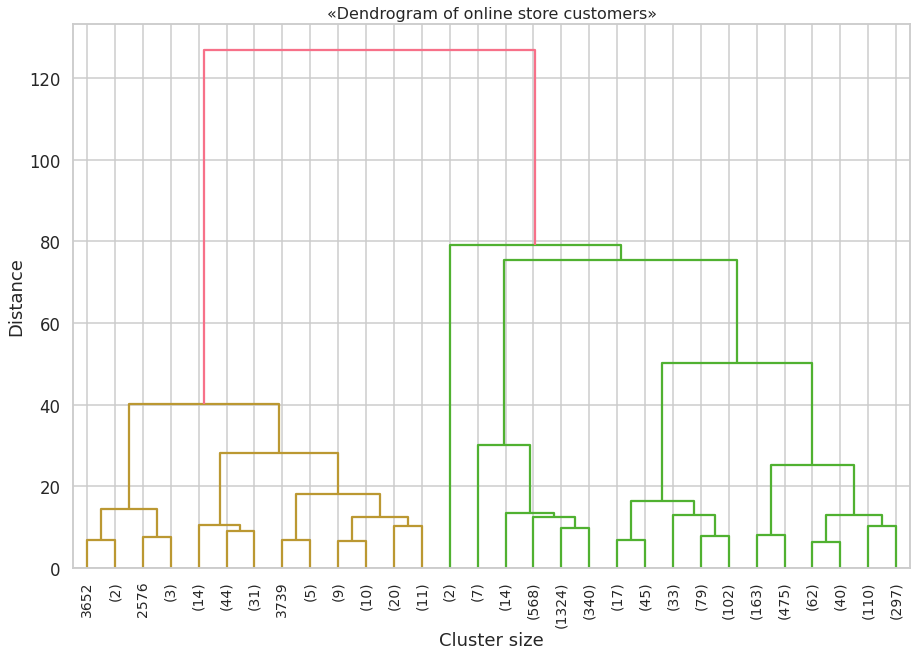

In [81]:
scaler = StandardScaler()

X_st = scaler.fit_transform(clusters_data)

linked = linkage(X_st, method = 'ward')

plt.figure(figsize=(15, 10)) 
dendrogram(linked, orientation='top', show_leaf_counts=True, truncate_mode='lastp', p=30, leaf_rotation=90, 
           leaf_font_size=14)
plt.title("«Dendrogram of online store customers»", fontsize=16)
plt.xlabel("Cluster size")
plt.ylabel("Distance")
plt.show()

#### 5.2. Let's train a clustering model based on the K-Means algorithm and predict customer segments.
The K-Means algorithm groups all objects step by step. Here is how it works:

    - There are K clusters. The algorithm selects their centers step by step and assigns objects to the cluster whose center is closer.
    - The centers are adjusted (change their position) until it allows minimizing the average distance from the objects of each cluster to its center.
    - When the distance from the objects to the center stops decreasing or decreases insignificantly, the algorithm stops and fixes the partition, considering it to be optimal.
Having understood the structure of the algorithm, let's run it in JupyterNotebook.

In [82]:

k_means = KMeans(n_clusters = 2, random_state=1)

labels = k_means.fit_predict(X_st)

clusters_data['cluster_km'] = labels
clusters_data 

,orders,quantity,price,weekdays,weekends,cluster_km
Description,,,,,,
4 purple flock dinner candles,32,103,2.330000,28,4,0
50's christmas gift bag large,105,1393,1.250000,90,15,0
dolly girl beaker,123,943,1.250000,101,22,0
i love london mini backpack,61,240,4.150000,51,10,0
nine drawer office tidy,29,52,14.781034,25,4,0
...,...,...,...,...,...,...
zinc t-light holder stars small,208,2989,0.845385,181,27,0
zinc top 2 door wooden shelf,8,8,16.950000,6,2,0
zinc willie winkie candle stick,166,2094,0.878193,144,22,0


#### 5.3. Let's look at the statistics by customer segments.

In [83]:
clusters_data['revenue'] = clusters_data['quantity'] * clusters_data['price']
clusters_data['avg_check'] = clusters_data['revenue'] / clusters_data['orders']
display(clusters_data.groupby(['cluster_km']).mean().T)

cluster_km,0,1
orders,53.234098,410.015504
quantity,465.106303,4282.596899
price,3.975053,2.593930
weekdays,46.103979,351.852713
weekends,7.130119,58.162791
revenue,919.560805,8571.541013
avg_check,21.308047,19.472625


#### Conclusion
**Cluster 0**

- Average number of orders 52 orders.
- The average number of quantity is 465 goods.
- Average total revenue 919
- Average number of weekdays 46.
- Average number of days off 7.
- Average check of the order 21

**Cluster 1**

- Average number of orders 410 orders.
- Average quantity of quantity 4282 goods.
- Average total revenue 8571
- Average number of weekdays 351.
- Average number of days off 58.
- Average order receipt 19

The results show that the profiles of buyers are very different. Cluster 0, probebly been active for only month and a half and cluster 1 more then a year . we can see that avrage bill of cluster 0 slightly larger.that mean if they were active for the same time that probely the results of cluster 0 would bern better .

## Step 6 Hypotheses test

#### Let's formulate the null and alternative hypotheses:

- Null hypothesis H₀: There are no statistically significant differences in the average check between customer segments.
- Alternative hypothesis H₁: There is a statistically significant difference in the average check between between customer segments

In [84]:

cluster0 = clusters_data[clusters_data['cluster_km']==0]['avg_check']
cluster1 = clusters_data[clusters_data['cluster_km']==1]['avg_check']

In [85]:

print("Variance of the 0th cluster: {} ".format(np.var(cluster0, ddof=1)))
print("Variance of the 1th cluster: {} ".format(np.var(cluster1, ddof=1)))
print("Variance ratio: {} ".format((np.var(cluster1, ddof=1))/(np.var(cluster0, ddof=1))))

Variance of the 0th cluster: 114594.24041446896 
Variance of the 1th cluster: 102.28510325616968 
Variance ratio: 0.0008925850277136171 


In [86]:

alpha = 0.05 
results = stats.mannwhitneyu(cluster0, cluster1)

print('p-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

p-value: 1.2480088528373514e-33
Rejecting the null hypothesis


In [87]:
print("Median of 0th cluster: {} ".format(int(np.median(cluster0))))
print("Median of 1th cluster: {} ".format(int(np.median(cluster1))))

Median of 0th cluster: 12 
Median of 1th cluster: 17 


#### Conclusion
P-value = 1.24 is significantly less than 0.05. Hence, there are reasons to reject the null hypothesis and believe that there are differences in the average check. That is, there is a statistically significant difference in the average check between between segments of buyers.

#### 6.2. Let us calculate the statistical significance of differences in the average sales volume between customer segments6.2. Посчитаем статистическую значимость различий в среднем объёме продаж между сегментами покупателей.

**Let's formulate the null and alternative hypotheses:**

- Null hypothesis H₀: There are no statistically significant differences in average sales volume between customer segments.
- Alternative Hypothesis H₁: There is a statistically significant difference in average sales between customer segments.

In [88]:
sales_volume_cluster0 = clusters_data[clusters_data['cluster_km']==0]['revenue']
sales_volume_cluster1 = clusters_data[clusters_data['cluster_km']==1]['revenue']


In [89]:
print("Variance of the 0th cluster: {} ".format(np.var(sales_volume_cluster0, ddof=1)))
print("Variance of the 1th cluster: {} ".format(np.var(sales_volume_cluster1, ddof=1)))
print("Variance ratio: {} ".format((np.var(sales_volume_cluster1, ddof=1))/(np.var(sales_volume_cluster0, ddof=1))))

Variance of the 0th cluster: 16707224.512477912 
Variance of the 1th cluster: 79542660.09433098 
Variance ratio: 4.76097391490274 


In [90]:
alpha = 0.05  
results = stats.mannwhitneyu(sales_volume_cluster0, sales_volume_cluster1) 

print('p-value::', results.pvalue)

if (results.pvalue < alpha):
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

p-value:: 3.167577013328368e-204
Rejecting the null hypothesis


In [91]:
print("Median of 0th cluster: {} ".format(int(np.median(sales_volume_cluster0))))
print("Median of 1th cluster: {} ".format(int(np.median(sales_volume_cluster1))))

Median of 0th cluster: 380 
Median of 1th cluster: 6319 


#### Conclusion
The p-value is significantly less than 0.05, indicating that there is a statistically significant difference in average sales between customer segments.

#### 6.3. Let's check the same average sales volumes on weekdays and weekends or not.

#### Let's formulate the null and alternative hypotheses:

- Null hypothesis H₀: Average weekday and weekend sales are the same.
- Alternative hypothesis H₁: Average weekday and weekend sales volumes are different.

In [92]:
sales_volume_weekdays = df[df['weekdays']==1]['revenue']
sales_volume_weekends = df[df['weekends']==1]['revenue']

In [93]:
print("Dispersion of sales volume on weekdays: {} ".format(np.var(sales_volume_weekdays, ddof=1)))
print("Dispersion of weekend sales: {} ".format(np.var(sales_volume_weekends, ddof=1)))
print("Variance ratio: {} ".format((np.var(sales_volume_weekdays, ddof=1))/(np.var(sales_volume_weekends, ddof=1))))

Dispersion of sales volume on weekdays: 1031.92282437493 
Dispersion of weekend sales: 33182.707873074396 
Variance ratio: 0.031098210197976886 


In [94]:
print("Standard deviation of weekday sales: {} ".format(np.std(sales_volume_weekdays, ddof=1)))
print("Standard deviation weekend sales: {} ".format(np.std(sales_volume_weekends, ddof=1)))

Standard deviation of weekday sales: 32.12355559982316 
Standard deviation weekend sales: 182.16121396464834 


In [95]:
alpha = 0.05

results = st.ttest_ind(sales_volume_weekdays, sales_volume_weekends) #equal_var = False

print('p-value::', results.pvalue)

if (results.pvalue < alpha):
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

p-value:: 9.93796892984554e-15
Rejecting the null hypothesis


In [96]:
print("Average sales volume on weekdays: {} ".format(int(np.mean(sales_volume_weekdays))))
print("Average weekend sales volume: {} ".format(int(np.mean(sales_volume_weekends))))

Average sales volume on weekdays: 17 
Average weekend sales volume: 20 


#### Conclusion
Based on the test, we see that the average sales volumes on weekdays and weekends are the same. Failed to reject the null hypothesis.

## Step 7. General conclusions and recommendations

ACCORDING TO THE RESULTS OF THE RESEARCH DATA ANALYSIS:

The data we have: from 2018-11-39 to 2019-12-07, one year and one month.

###  1 Data preprocessing 
    - At the data inspection stage, the following data problems were identified, such as incorrect type in the date, the case of letters in the column with the name of the product varied, outliers in the quantity and price of the product.
     - At the stage of data preprocessing, the following decisions were made: converted the date to the date format, converted the product name to lower case, At this stage, incomplete duplicates were found in the column with the product name and order ID. Since the share of duplicates in the total number of records is almost 3%, I decided to delete them. Perhaps there were failures when unloading data or when writing.
     - we cleared all missing values from Description and CustomerID columns
    - We  cleared all negative numbers from price and Quantity columns   
    - At the stage of processing outliers, anomalous values in the number of goods were removed from the dataset using percentiles.
    - Also, added the necessary columns for further research.

### 2 Exploratory data analysis


    - In total there are 4264 buyers in the log.
    - Most buyers made only 1 order.
    - There are very few buyers who ordered 3 orders.
    - Average number of unique buyers per day: 48 people.
    - Average number of unique buyers per week: 273 people.
    - Average number of unique buyers per month: 887 people.
    - Weekly Audience: 17.7%
    - Monthly Audience: 5.5%
The average number of unique buyers per month is 887 people. This is a small number. It can be seen from the "sticky factor" metric, its indicators are low, it is obvious that the online store is rarely accessed.

Based on the graphs obtained, from November 2018 till November 2019 there is an stedy increase in buyer activity . There is a noticeable decrease in activity from from December2019. Buyers are most active at the end and beginning of the year.

#### orders
- In the table there are 4264 unique buyers who made 15935 orders in 375 days.
- Most orders are made in the morning from 11 am to 3 pm. The peak is at 12 am. Least of all clients order at night.
- Since Monday, an increase in orders has been seen. The peak falls on Friday, with the highest number of orders. Then we see a decrease, the least ordered on Saturday.
- In November and October 2019, the most orders were made, 2402 and 1808, this is due to the activity of customers. That is, the number of completed orders depends on the activity of buyers.

#### revenue
- Amount of revenue:  6,002,441.
- Average revenue per customer: 17.55
- Day of the week is Friday at 12:00 is the most productive, brings the most revenue.
- During the entire period of 2018-2019 there is a negative trend in total sales revenue. The total amount of revenue at the May2019 began decresing  till the end of the year. Perhaps the reason could be a general deterioration in business conditions.
- There is increse in sales revenue . In Novenber 2018, the average buyer's check was CU 339.48, and a year later, in November 2019, it was  541.88

### 3 Analysis of the trading range


**Top 5 most profitable products for the entire period**

    - regency cakestand 3 tier	
    - postage	
    - white hanging heart t-light holder
	- party bunting	
	- jumbo bag red retrospot	


**Top 5 best-selling products of the entire period**

	- jumbo bag red retrospot	
	- world war 2 gliders asstd designs	
	- white hanging heart t-light holder	
	- assorted colour bird ornament	
	- pack of 72 retrospot cake cases	

####  correlation matrix findings
There is a logical interdependence between the variables. There is a slight correlation of revenue with the price of the product, corr = 0.30, that is, the higher the price of the product, the greater the revenue.Also, there are other variables that are positively correlated with revenue, Quantity UnitPrice.

**ACCORDING TO THE ANALYSIS OF THE COMMODITY RANGE**


The largest share of the product range is occupied by the "Home decoration and" - 61% of the total product range, it can be called the main one. This category includes all that connect with home decoretion and improvment . Then comes the category "Pantry items kitchen" 29%, "toys" 5.4%, "Jewelry" 4.5%.

**Top-selling products in each category by number of orders for the entire period:**
- In the Pantry items kitchen category, the best-selling product: white hanging heart t-light holder
- In the "home decoration and" category the best-selling item: assorted colour bird ornament	
- In the "toys" category, the best-selling product: rabbit night light	
- In the category "Jewelry" the best-selling product: pink blue felt craft trinket box

**The most profitable products in each category for the entire period:**

- In the Pantry items kitchen category, the best-selling product: regency cakestand 3 tier	
- In the  "home decoration and" category the best-selling item: postage	
- In the "toys" category, the best-selling product: rabbit night light	
- In the category "Jewelry" the best-selling product: 6 ribbons rustic charm	

**We calculated the revenue and the number of customers by category**
- Looking at the amount of revenue, the most profitable category is “home decoration and”. Less profitable category "jewelary".
- Looking at the number of orders, the best-selling products are in the home decoration and category,confirming that the main product range is in the home decoration and category and the rest are complementary.
- If you look at the average bill, in terms of sales efficiency, then the category "Home decoration and" as the main assortment of goods, gives the largest revenue. Jewelry category gives the lowest revenue we can work with the assortment and its sorting, offering items more expensive than the average bill. Conduct promotions and special offers.
- The main income of the online store is from the categories "Home decoration and", "Pantry items kitchen""cleaning".

**Analyzed sales by category by season.**

The amount of revenue, broken down by season, showed that the most profitable period is the autumn period. That is, the largest sales volumes fall on the forth quarters of the year. All the others season have the same amount of income . Broken down by month, it's more illustrative. 


 ####  4 Segmentation of buyers based on their purchase history


**ACCORDING TO THE RESULTS OF BUYER SEGMENTATION**

**Cluster 0**

- Average number of orders 52 orders.
- The average number of quantity is 465 goods.
- Average total revenue 919
- Average number of weekdays 46.
- Average number of days off 7.
- Average check of the order 21

**Cluster 1**

- Average number of orders 410 orders.
- Average quantity of quantity 4282 goods.
- Average total revenue 8571
- Average number of weekdays 351.
- Average number of days off 58.
- Average order receipt 19

The results show that the profiles of buyers are very different. Cluster 0, probebly been active for only month and a half and cluster 1 more then a year . we can see that avrage bill of cluster 0 slightly larger.that mean if they were active for the same time that probely the results of cluster 0 would bern better .

### 5 Hypotheses test

- The average check between customer segments is different.
- The average sales volumes between customer segments are different.
- The average sales volumes on weekdays and weekends are the same.

**RECOMMENDATIONS:**

- Improve the average check of the "jewelary" category as the lowest product range. To do this, it is necessary to offer store customers to purchase related products at a discount. You can work with the assortment and its sorting, offering items more expensive than the average bill. Conduct promotions and special offers.

- Increase sales volumes. to keep the  incline  in income, for this you need to look at the factors that affect sales. Factors may be the following:

      - general business conditions, management, personnel;
      - product distribution channels
      - seasonal dynamics of sales, product range. Keep in mind that the autumn period The spring-summer period is profitable 
      - the number of buyers;
      -competitors;
      - overall market dynamics.
- Depending on the season, create up-to-date recommendation offers within the product category.
- Also, customers need to form the habit of visiting the online store more often.

<a href="https://public.tableau.com/app/profile/dima6094/viz/e-commercefinalprojectTablaueDashboardSuggestion1_16501156795700/Numberofpurchasesperday">Link to Dashboard</a>

<a href="https://drive.google.com/file/d/1kLrcoTNNn9ltu2c3R63_ZG-99uuAMX5n/view?usp=sharing">Presentation link</a>